<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Intro to Regression with Tensorflow & Keras

------


### OBJECTIVES

- Build regression models using `tensorflow` & `keras`
- Refine models by adjusting the architecture of a network
- Use regularization to attempt performance improvement
- Save the model

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import root_mean_squared_error

# Sequential allows us to build neural networks by stacking layers linearly
from tensorflow.keras.models import Sequential


# Import core layer types from Keras:
# - Dense: Standard fully-connected neural network layer
# - Dropout: Randomly sets input units to 0 during training (prevents overfitting)
# - BatchNormalization: Normalizes and scales inputs for each mini-batch (improves training stability)
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization , Input

from tensorflow.keras.callbacks import EarlyStopping
 
# Import regularization functions from Keras:
# - l1: Lasso Regularization (adds absolute value of weights to loss)
# - l2: Ridge Regularization (adds squared value of weights to loss) 
# - l1_l2: Elastic Net Regularization (combines both l1 and l2)
# All of these help prevent overfitting by penalizing large weights
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [4]:
cali = fetch_california_housing()
X, y = cali.data, cali.target

### Part 1

- Load in the California housing data into a Pandas DataFrame called `cali_df`.
- Add the target as a column named `price`

In [6]:
cali_df = pd.DataFrame(cali.data, columns=cali.feature_names)

In [7]:
cali_df['price'] = cali.target

In [8]:
cali_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


### Part 2

- Create `X` from selected features (your choice) and set `y` as the `price` column
- Split `X` and y into training and test sets

In [10]:

X = cali_df[['MedInc', 'HouseAge','AveRooms', 'AveBedrms', 'AveOccup']]

In [11]:
y = cali_df['price']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [13]:
X_train.shape

(15480, 5)

### Part 3

Setup a `Sequential` model with one layer containing 24 nodes.  Make sure to include the output layer and use a `ReLU` activation for the hidden layer.

In [15]:
model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(24, activation='relu'),      
    Dense(1, activation='linear')      
])

In [16]:

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 24)             │           144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            25 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 169 (676.00 B)

 Trainable params: 169 (676.00 B)

 Non-trainable params: 0 (0.00 B)

`Compile` the network using an adam optimizer and appropriate loss function with the mean squared error metric.

In [18]:
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

In [19]:
model

<Sequential name=sequential, built=True>

### Part 4

Fit the model on the training data with 100 epochs (and suppress the output with `verbose = 0`). Save the fit model to the variable `history`.

In [21]:
history= model.fit(X_train, y_train, validation_data=(X_test, y_test),  epochs=100, verbose=0)

### Part 5

Use matplotlib to create side-by-side subplots showing:

- Training loss vs validation loss
- Training mean squared error vs validation mean squared error
- You can plot these metrics from the training history.

In [23]:
history.history

{'loss': [12.877928733825684,
  7.762238502502441,
  2.6185007095336914,
  0.8662077188491821,
  0.654727578163147,
  0.6337423324584961,
  0.6349086761474609,
  0.6156767010688782,
  0.6403628587722778,
  0.6054459810256958,
  0.6438763737678528,
  0.6186754703521729,
  0.5727875232696533,
  0.7025856971740723,
  0.5825940370559692,
  0.5474881529808044,
  0.8192217350006104,
  0.5300772190093994,
  0.7489989399909973,
  0.5130060911178589,
  0.5132099986076355,
  0.5665631890296936,
  0.5033238530158997,
  0.5080366134643555,
  0.7384743094444275,
  0.553180992603302,
  1.602867841720581,
  0.519112229347229,
  0.5008425712585449,
  0.490151047706604,
  0.49214547872543335,
  0.49906471371650696,
  0.4932684600353241,
  0.5798472762107849,
  0.4876353442668915,
  0.8760569095611572,
  0.48265668749809265,
  0.5135172605514526,
  0.5694969892501831,
  0.48974910378456116,
  0.4901184141635895,
  0.8106589317321777,
  0.5047698616981506,
  0.4813840687274933,
  0.5090578198432922,
  0.

In [24]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

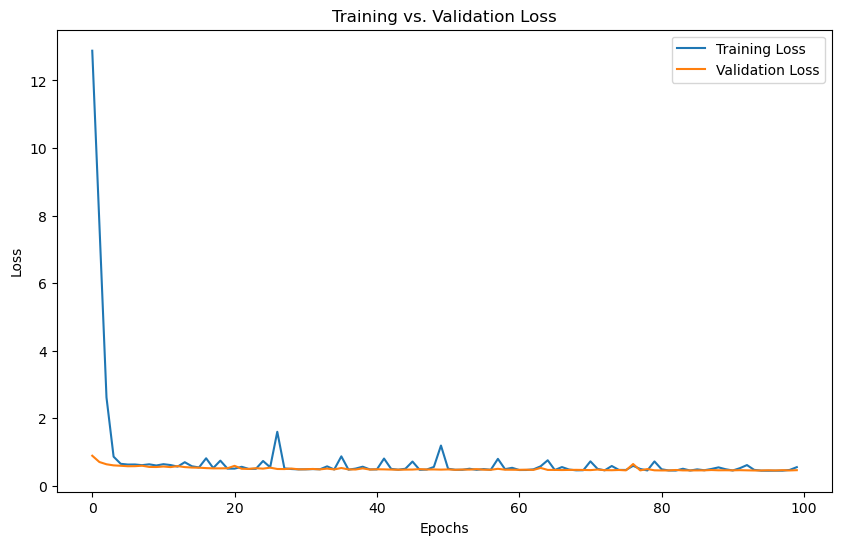

In [25]:
training_loss = history.history['loss']
validation_loss = history.history.get('val_loss') 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(training_loss, label='Training Loss')
plt.plot(validation_loss, label='Validation Loss')
plt.title('Training vs. Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

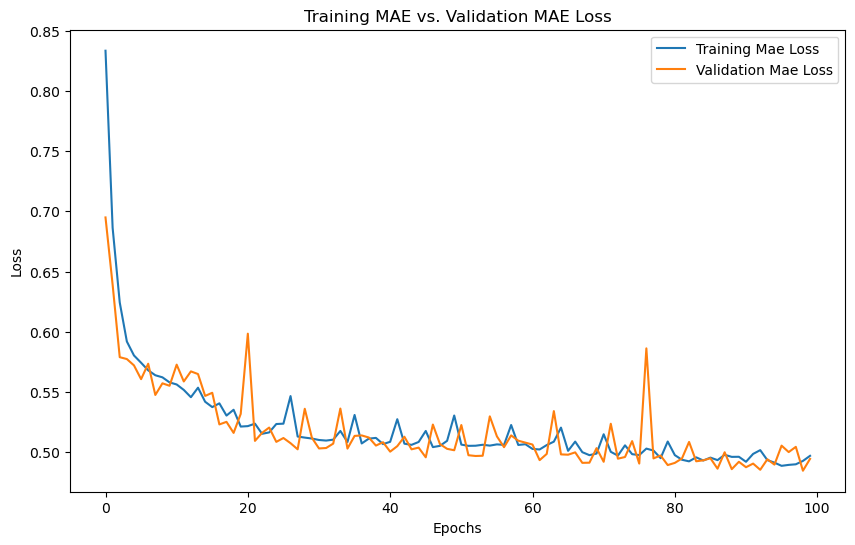

In [26]:
trainingmae_loss = history.history['mae']
validationmae_loss = history.history.get('val_mae') 

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(trainingmae_loss, label='Training Mae Loss')
plt.plot(validationmae_loss, label='Validation Mae Loss')
plt.title('Training MAE vs. Validation MAE Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

### Part 6

Create a second, deeper network with the following architecture:

- First hidden layer: 64 nodes with ReLU activation
- Second hidden layer: 128 nodes with ReLU activation
- Third hidden layer: 64 nodes with ReLU activation
- Output layer: [appropriate nodes for your classification task]

In [28]:
# Define the model
second_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    Dense(64, activation='relu'),      
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(1, activation='linear')    
])




In [29]:
second_model.compile(optimizer='adam',           
                     loss='mse',                   
                     metrics=['mae'])              


In [30]:
second_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                 │ (None, 64)             │           384 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,025 (66.50 KB)

 Trainable params: 17,025 (66.50 KB)

 Non-trainable params: 0 (0.00 B)

### Part 7

Add a `BatchNormalization` layer before the first dense layer and retrain the model with the same parameters as before.

##### Does this change anything?

In [33]:
BN_model = Sequential([
    Input(shape=(X_train.shape[1],)),  
    BatchNormalization(),
    Dense(64, activation='relu'),      
    Dense(128, activation='relu'),     
    Dense(64, activation='relu'),      
    Dense(1, activation='linear')    
])


In [34]:
BN_model.compile(optimizer='adam',            
                        loss='mse',                 
                        metrics=['mae'])           


In [ ]:
history_bn = BN_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, verbose=0)

In [ ]:
BN_model.summary()

### Part 8

**Early Stopping**  

Do we need 100 epochs to effectively train the data?  

- Iterate to now include an `EarlyStopping` callback in your model above.  
- Set the `patience` equal to 5.  


In [ ]:
early_stopping = EarlyStopping(monitor='val_loss',   
                               patience=5,          
                               restore_best_weights=True, 
                               verbose=1)       

In [ ]:
history_es = BN_model.fit(X_train, y_train, 
                                    epochs=100, 
                                    verbose=0, 
                                    validation_data=(X_test, y_test),  
                                    callbacks=[early_stopping])

**How many epochs do you think are appropriate?**

In [ ]:
# The best the result on early stopping is epoch 4, that the model reached its optimal validation performance in training dataset. 

### Part 9

**Dropout**  

- Add dropout layers to the model:
   - 5% dropout after the second layer
   - 20% dropout after the third layer
   - Train the model to compare **performance and convergence time**

In [ ]:
model_dp = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu'),  
    Dense(64, activation='relu'), 
    Dropout(0.05),  # 5% dropout after the second layer
    Dense(32, activation='relu'), 
    Dropout(0.20),  # 20% dropout after the third layer
    Dense(1, activation='sigmoid')  
])

In [ ]:
model_dp.compile(optimizer='adam',           
                     loss='mse',                   
                     metrics=['mae'])       

hist_dp = model_dp.fit(X_train, y_train,
                       epochs=100, verbose=0, 
                       validation_data=(X_test, y_test),  
                       callbacks=[early_stopping])

### Part 9 - continued: RMSE vs. Baseline

Calculate and compare the RMSE of both the baseline model and your optimized model.

In [ ]:
y_baseline = model.predict(X_test)[:, 0]
y_optimized = model_dp.predict(X_test)[:, 0]

rmse_baseline = root_mean_squared_error(y_test, y_baseline)
rmse_optimized = root_mean_squared_error(y_test, y_optimized)


print(f"Baseline Model RMSE: {rmse_baseline}")
print(f"Optimized Model RMSE: {rmse_optimized}")

### Part 10: Regularization and Scaling

Finally, we want to see if regularizing will improve the model.  

- Create a model with the same architecture and dropout layers
- Add l2 regularization (0.01) to **each** dense layer
- Calculate the RMSE and compare it against the baseline model

In [ ]:
model_reg = Sequential([
    Input(shape=(X_train.shape[1],)), 
    Dense(128, activation='relu',kernel_regularizer=l2(0.01)),Dropout(0.05), 
    Dense(64, activation='relu',kernel_regularizer=l2(0.01)), Dropout(0.20),  
    Dense(32, activation='relu',kernel_regularizer=l2(0.01)),  
    Dense(1, activation='sigmoid') 
])


model_reg.compile(optimizer='adam',           
                     loss='mse',                   
                     metrics=['mae'])  


hist_reg = model_reg.fit(X_train, y_train,
                       epochs=100, verbose=0, 
                       validation_data=(X_test, y_test),  
                       callbacks=[early_stopping])

### Part 11: Saving the Model

Save your best model in HDF5 format using `model.save(cali_housing.h5)`

In [ ]:
from tensorflow.keras.models import save_model
#save_model(model.save(model_reg), 'cali_housing.h5')

save_model(model_reg, 'cali_housing.keras')

#model_reg.save('cali_housing.h5')